In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df = pd.read_csv("netflix1.csv")
df.shape

(8790, 10)

In [3]:
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [4]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [5]:
df.describe()

,release_year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [6]:
df.dtypes

show_id         object
type            object
title           object
director        object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [8]:
df.duplicated().sum()

0

In [9]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')

In [10]:
df.rename(columns={'date_added': 'Date',"listed_in":"category"},inplace=True)

In [11]:
df.head()

,show_id,type,title,director,country,Date,release_year,rating,duration,category
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [12]:
df['Date'] = pd.to_datetime(df['Date'])

In [13]:
df.describe()

,Date,release_year
count,8790,8790.000000
mean,2019-05-17 21:44:01.638225408,2014.183163
min,2008-01-01 00:00:00,1925.000000
25%,2018-04-06 00:00:00,2013.000000
50%,2019-07-03 00:00:00,2017.000000
75%,2020-08-19 18:00:00,2019.000000
max,2021-09-25 00:00:00,2021.000000
std,NaN,8.825466


In [14]:
typeOfShow = df['type'].value_counts().reset_index()
typeOfShow

,type,count
0,Movie,6126
1,TV Show,2664


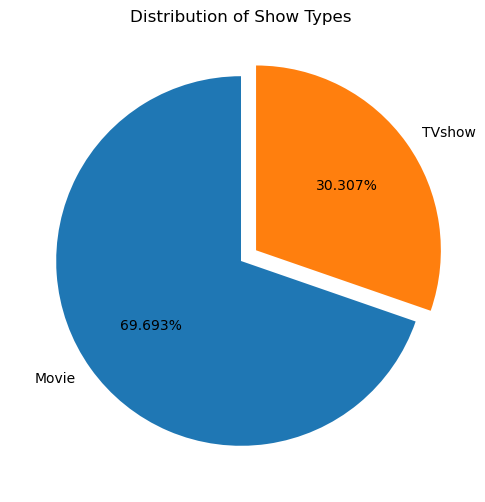

In [15]:
plt.figure(figsize=(20, 6))  
plt.pie(typeOfShow['count'], labels=['Movie', 'TVshow'],
        autopct='%1.3f%%', explode=[0, 0.1], startangle=90)
plt.title('Distribution of Show Types')
plt.show()

In [16]:
numOfDirectors = df['director'].value_counts()
numOfDirectors.head(10)

director
Not Given                 2588
Rajiv Chilaka               20
Alastair Fothergill         18
Raúl Campos, Jan Suter      18
Suhas Kadav                 16
Marcus Raboy                16
Jay Karas                   14
Cathy Garcia-Molina         13
Martin Scorsese             12
Youssef Chahine             12
Name: count, dtype: int64

In [17]:
given_directors = numOfDirectors.sum() - numOfDirectors[0]
print(f'Num of given directors is {given_directors}')

Num of given directors is 6202


In [18]:
import plotly.graph_objects as go # type: ignore
fig = go.Figure(data=[go.Pie(labels=['Given directors', 'Not given directors'],
                             values=[numOfDirectors[0], given_directors],
                             title='Distribution of directors',
                             marker=dict(colors=['darkblue', 'darkred']))])
fig.show()

In [19]:
numOfDirectorMovies = df.groupby(['director', 'type'])[
    'director'].value_counts().reset_index().head(10)
numOfDirectorMovies

,director,type,count
0,A. L. Vijay,Movie,2
1,A. Raajdheep,Movie,1
2,A. Salaam,Movie,1
3,A.R. Murugadoss,Movie,2
4,Aadish Keluskar,Movie,1
5,Aamir Bashir,Movie,1
6,Aamir Khan,Movie,1
7,Aanand Rai,Movie,1
8,Aaron Burns,Movie,1
9,"Aaron Hancox, Michael McNamara",Movie,1


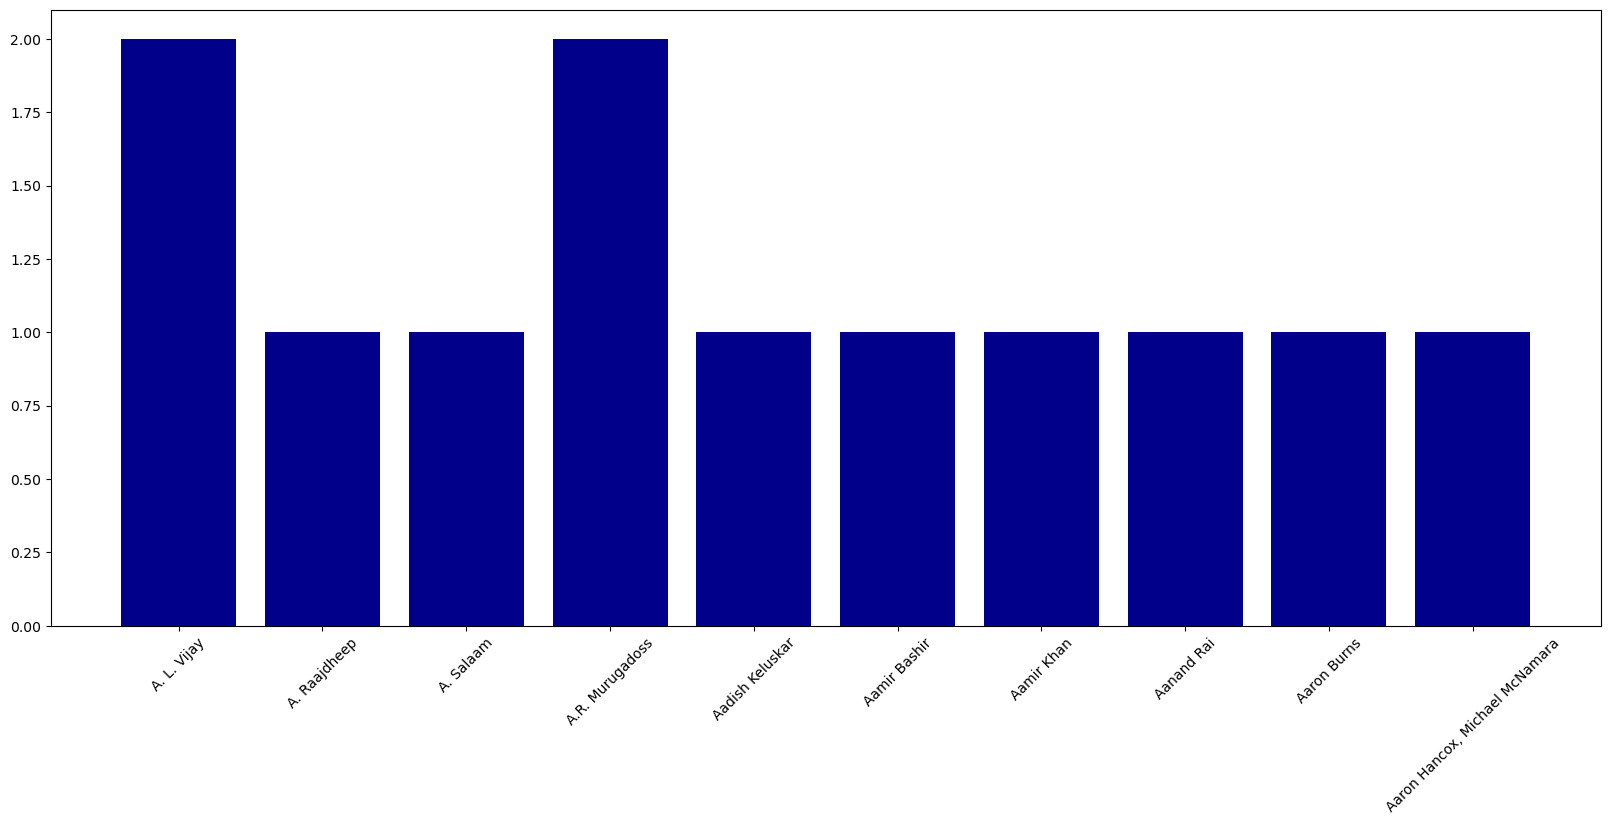

In [20]:
plt.figure(figsize=(20, 8))
plt.bar(numOfDirectorMovies['director'],
        numOfDirectorMovies['count'], color='darkblue')
plt.xticks(rotation=45)
plt.show()

In [21]:
country = df['country'].value_counts().reset_index(
).sort_values(by='count', ascending=False).head(10)
country

,country,count
0,United States,3240
1,India,1057
2,United Kingdom,638
3,Pakistan,421
4,Not Given,287
5,Canada,271
6,Japan,259
7,South Korea,214
8,France,213
9,Spain,182


Text(0, 0.5, 'Num of Movies')

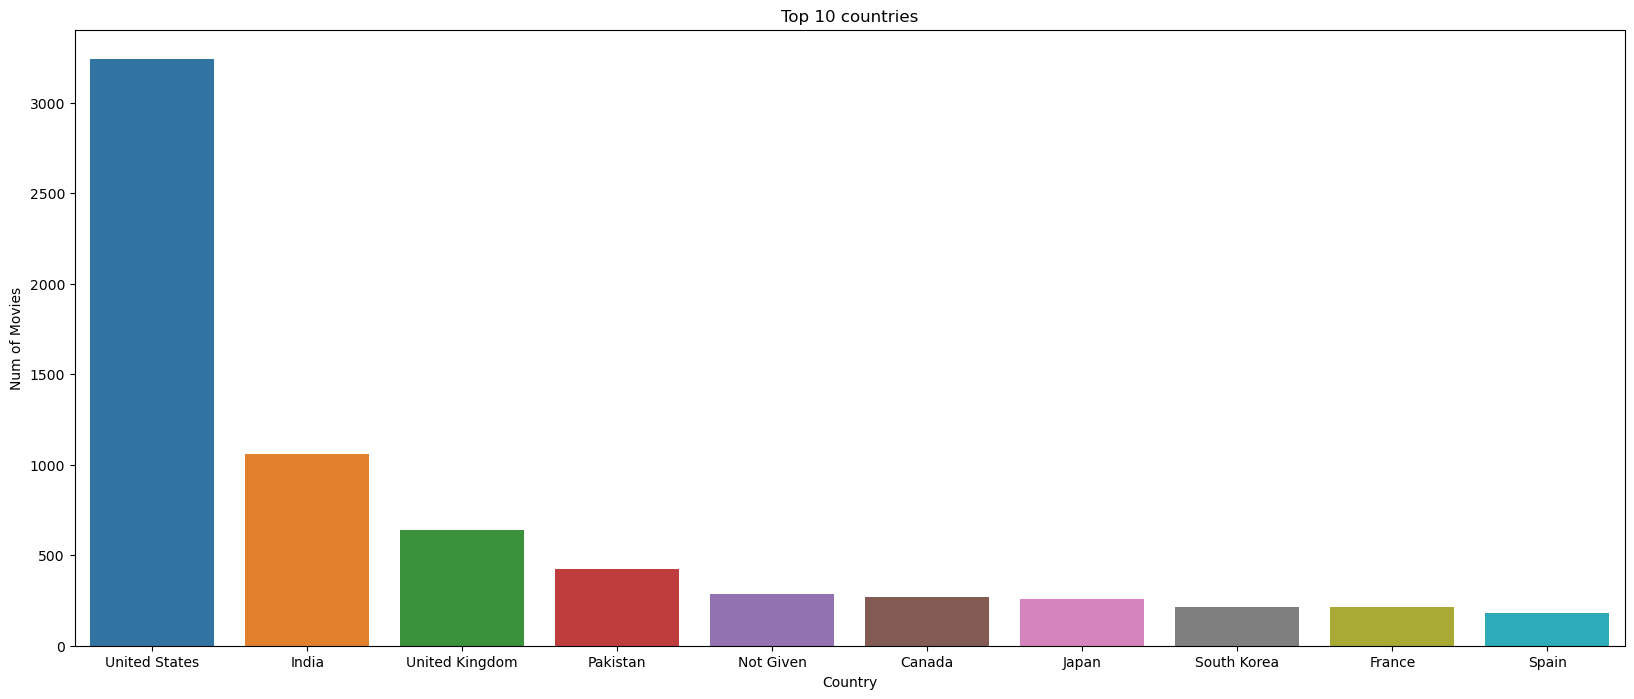

In [22]:
plt.figure(figsize=(20, 8))
plt.title('Top 10 countries')
sns.barplot(x='country', y='count', data=country)
plt.xlabel('Country')
plt.ylabel('Num of Movies')

In [23]:
country.sort_values(by='count', ascending=False)

,country,count
0,United States,3240
1,India,1057
2,United Kingdom,638
3,Pakistan,421
4,Not Given,287
5,Canada,271
6,Japan,259
7,South Korea,214
8,France,213
9,Spain,182


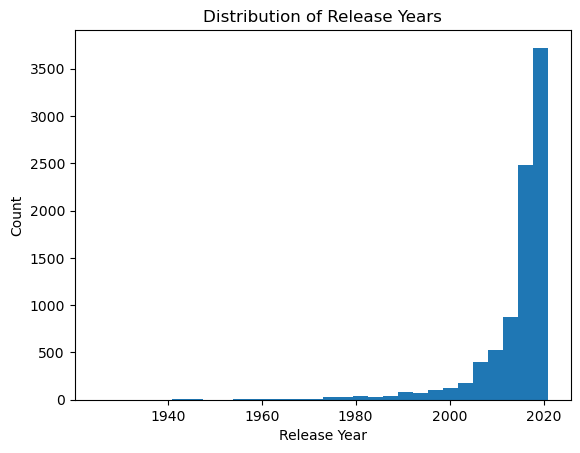

In [24]:
df['release_year'].plot(kind='hist', bins=30)
plt.title('Distribution of Release Years')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()

In [25]:
rates = df.groupby(['rating', 'type'])['type'].value_counts().reset_index()
rates

,rating,type,count
0,G,Movie,41
1,NC-17,Movie,3
2,NR,Movie,75
3,NR,TV Show,4
4,PG,Movie,287
5,PG-13,Movie,490
6,R,Movie,797
7,R,TV Show,2
8,TV-14,Movie,1427
9,TV-14,TV Show,730


In [26]:
top10Movie = rates[rates['type'] == 'Movie'].sort_values(by='count', ascending=False).iloc[0:10]
top10Movie

,rating,type,count
12,TV-MA,Movie,2062
8,TV-14,Movie,1427
6,R,Movie,797
14,TV-PG,Movie,540
5,PG-13,Movie,490
4,PG,Movie,287
18,TV-Y7,Movie,139
16,TV-Y,Movie,131
10,TV-G,Movie,126
2,NR,Movie,75


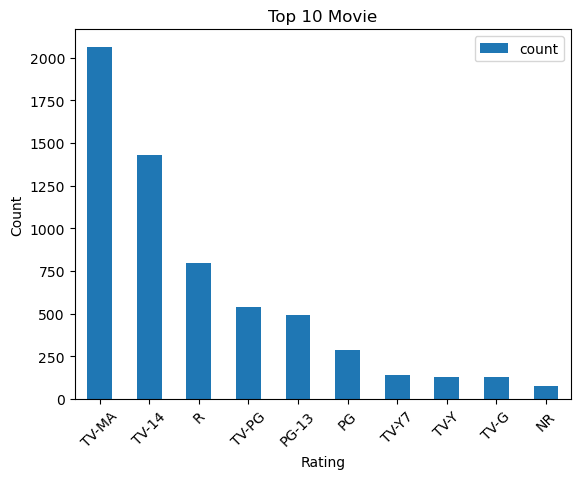

In [27]:
top10Movie.plot(x='rating', y='count', kind='bar')
plt.title('Top 10 Movie')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [28]:
top10TvShow = rates[rates['type'] == 'TV Show'].sort_values(
    by='count', ascending=False).iloc[0:10]
top10TvShow

,rating,type,count
13,TV-MA,TV Show,1143
9,TV-14,TV Show,730
15,TV-PG,TV Show,321
19,TV-Y7,TV Show,194
17,TV-Y,TV Show,175
11,TV-G,TV Show,94
3,NR,TV Show,4
7,R,TV Show,2
21,TV-Y7-FV,TV Show,1


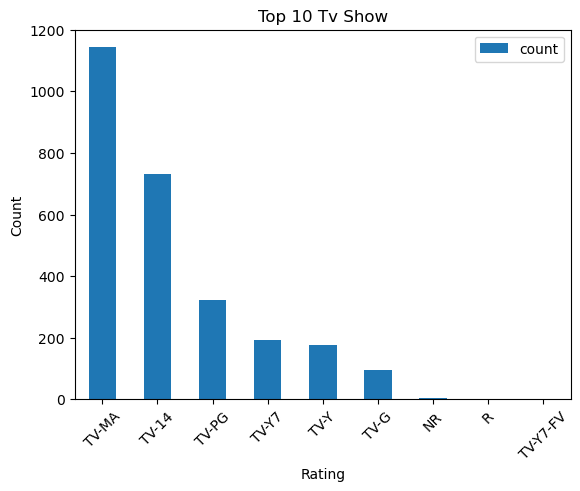

In [29]:
top10TvShow.plot(x='rating', y='count', kind='bar')
plt.title('Top 10 Tv Show')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()